Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 1s 96us/step - loss: 1.5835 - acc: 0.5143 - val_loss: 0.9290 - val_acc: 0.6820
Epoch 2/5
6000/6000 [==============================] - 0s 17us/step - loss: 0.8604 - acc: 0.7127 - val_loss: 1.0410 - val_acc: 0.6490
Epoch 3/5
6000/6000 [==============================] - 0s 18us/step - loss: 0.7442 - acc: 0.7642 - val_loss: 0.7442 - val_acc: 0.7550
Epoch 4/5
6000/6000 [==============================] - 0s 17us/step - loss: 0.6341 - acc: 0.7968 - val_loss: 0.6706 - val_acc: 0.7840
Epoch 5/5
6000/6000 [==============================] - 0s 18us/step - loss: 0.5742 - acc: 0.8170 - val_loss: 0.6508 - val_acc: 0.7980


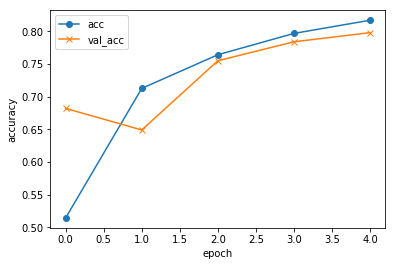

array([7, 2, 1, 0, 4, 1, 4, 4, 6, 9])

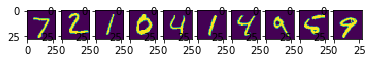

In [4]:
# ML_010_DL_mnist

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras import optimizers

(ax, ay), (ex, ey) = mnist.load_data()

ax = ax.reshape(ax.shape[0], 784)[:6000]
ex = ex.reshape(ex.shape[0], 784)[:1000]
ay = to_categorical(ay)[:6000]
ey = to_categorical(ey)[:1000]

m = Sequential()

m.add(Dense(256, input_dim=784))
m.add(Activation("sigmoid"))

m.add(Dense(128))
m.add(Activation("sigmoid"))
m.add(BatchNormalization())
m.add(Dropout(0.5))

m.add(Dense(10))
m.add(Activation("softmax"))

op = optimizers.SGD(lr=0.1)

m.compile(optimizer=op, loss="categorical_crossentropy", metrics=['accuracy'])

hi = m.fit(ax, ay, batch_size=500, epochs=5, verbose=1,validation_data=(ex, ey))

plt.plot(hi.history['acc'], label="acc", ls="-", marker="o")
plt.plot(hi.history['val_acc'], label="val_acc", ls="-", marker="x")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.show()

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(ex[i].reshape((28,28)))
py = np.argmax(m.predict(ex[0:10]), axis=1)
py